In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ścieżki do folderów z danymi
train_dir = 'train set'
valid_dir = 'valid set'
test_dir = 'test set'


In [4]:
# Tworzenie generatora danych treningowych z augmentacją
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # zakres losowego obrót w stopniach
    width_shift_range=0.2,  # zakres losowego przesunięcia w poziomie
    height_shift_range=0.2,  # zakres losowego przesunięcia w pionie
    shear_range=0.2,  # zakres skosu obrazu
    zoom_range=0.2,  # zakres przybliżenia obrazu
    horizontal_flip=True  # losowe odbicie lustrzane
)


train_idg = ImageDataGenerator(rescale=1. / 255.0,
                            #horizontal_flip = True,
                            #vertical_flip = False,
                            #height_shift_range= 0.2,
                            #width_shift_range=0.2,
                            #rotation_range=20,
                            #shear_range = 0.1,
                            #zoom_range=0.1,
                            #fill_mode='nearest')
test_idg = ImageDataGenerator(rescale=1. / 255.0)
train_gen = train_idg.flow_from_dataframe(dataframe=train_df,
                                          directory=None,
                                          x_col = 'path',
                                          y_col = 'category_id',
                                          class_mode='categorical',
                                          target_size = IMG_SIZE,
                                          batch_size = 32,
                                          subset='training',
                                          shuffle=True,
                                          seed=42
                                          )
valid_gen = test_idg.flow_from_dataframe(dataframe=valid_df,
                                          directory=None,
                                          x_col = 'path',
                                          y_col = 'category_id',
                                          class_mode='categorical',
                                          target_size = IMG_SIZE,
                                          batch_size = 32,
                                          subset='validation',
                                          shuffle=True,
                                          seed=42
                                          )
test_gen = test_idg.flow_from_dataframe(dataframe=test_df,
                                       directory=None,
                                       x_col = 'path',
                                       y_col = 'category_id',
                                       class_mode='categorical',
                                       target_size = IMG_SIZE,
                                       batch_size = 32,
                                       shuffle=False)

In [5]:
# Tworzenie generatora danych walidacyjnych i testowych bez augmentacji
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Przygotowanie danych treningowych, walidacyjnych i testowych
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # ZMIENIĆ NA 100, 100
    batch_size=32,
    class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 9396 images belonging to 3 classes.
Found 290 images belonging to 3 classes.
Found 290 images belonging to 3 classes.


In [8]:
# Definicja modelu
model = Sequential()

# Dodanie warstw konwolucyjnych
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Dodanie warstw gęsto połączonych
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 wyjścia dla trzech rzędów ptaków

# Kompilacja modelu
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Wyświetlenie podsumowania modelu
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
# Trenowanie modelu z nowym generatorem danych
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=12,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)


Epoch 1/12


2023-07-15 20:42:13.987051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


294/294 [==============================] - ETA: 0s - loss: 1.0080 - accuracy: 0.4870

2023-07-15 20:45:09.559297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


294/294 [==============================] - 177s 599ms/step - loss: 1.0080 - accuracy: 0.4870 - val_loss: 0.8215 - val_accuracy: 0.6034
Epoch 2/12
294/294 [==============================] - 158s 535ms/step - loss: 0.8390 - accuracy: 0.6245 - val_loss: 0.6225 - val_accuracy: 0.7552
Epoch 3/12
294/294 [==============================] - 162s 549ms/step - loss: 0.7326 - accuracy: 0.6873 - val_loss: 0.5970 - val_accuracy: 0.7828
Epoch 4/12
294/294 [==============================] - 164s 558ms/step - loss: 0.6568 - accuracy: 0.7255 - val_loss: 0.4272 - val_accuracy: 0.8207
Epoch 5/12
294/294 [==============================] - 147s 499ms/step - loss: 0.5948 - accuracy: 0.7555 - val_loss: 0.3872 - val_accuracy: 0.8379
Epoch 6/12
294/294 [==============================] - 139s 473ms/step - loss: 0.5451 - accuracy: 0.7763 - val_loss: 0.3694 - val_accuracy: 0.8448
Epoch 7/12
294/294 [==============================] - 138s 470ms/step - loss: 0.5024 - accuracy: 0.7991 - val_loss: 0.3729 - val_accura

In [10]:
# Testowanie modelu
loss, accuracy = model.evaluate(test_generator)
print("Test Loss: {:.2f}".format(loss))
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

2023-07-15 21:12:52.462240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 145ms/step - loss: 0.2032 - accuracy: 0.9379
Test Loss: 0.20
Test Accuracy: 93.79%


In [11]:
# Ocena wydajności modelu na danych walidacyjnych
loss, accuracy = model.evaluate(valid_generator)
print("Validation Loss: {:.2f}".format(loss))
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

2023-07-15 21:12:59.717665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 136ms/step - loss: 0.2780 - accuracy: 0.9138
Validation Loss: 0.28
Validation Accuracy: 91.38%


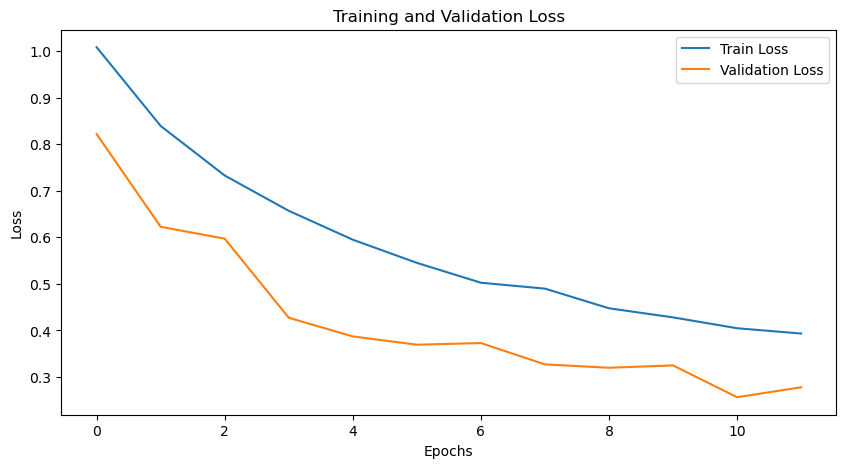

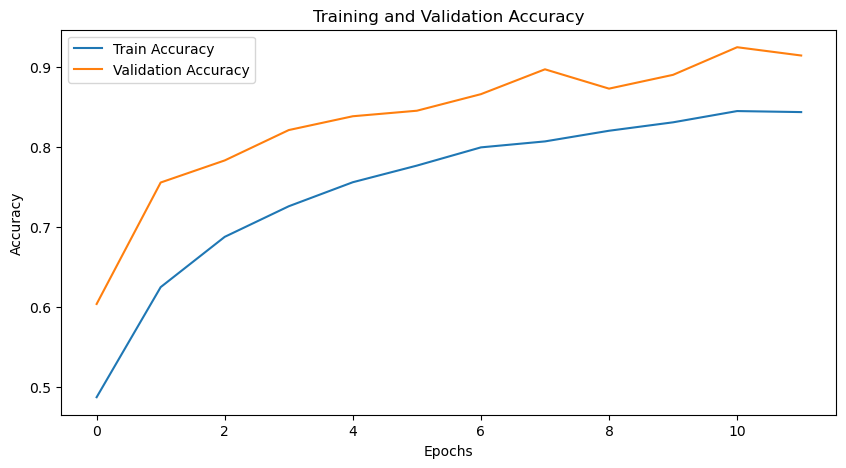

In [12]:
import matplotlib.pyplot as plt

# Wizualizacja krzywych uczenia
def plot_learning_curves(history):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curves(history)

In [14]:
import numpy as np

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))


2023-07-15 21:13:45.584683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 131ms/step
Accuracy: 31.38%


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=target_names))


Confusion Matrix:
[[31 32 32]
 [27 35 33]
 [30 45 25]]
Classification Report:
              precision    recall  f1-score   support

        DUCK       0.35      0.33      0.34        95
       EAGLE       0.31      0.37      0.34        95
     SPARROW       0.28      0.25      0.26       100

    accuracy                           0.31       290
   macro avg       0.31      0.31      0.31       290
weighted avg       0.31      0.31      0.31       290



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ConfusionMatrixDisplay(cm, display_labels=data_20.target_names).plot(xticks_rotation="vertical")

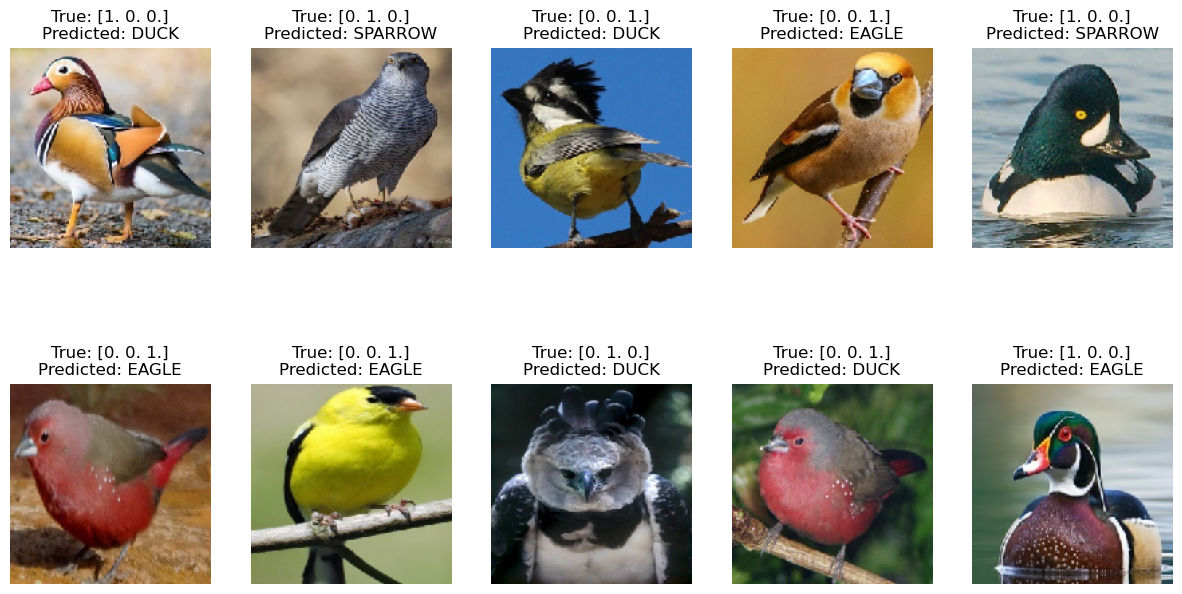

In [16]:
import random
import matplotlib.pyplot as plt

# Wybór 10 losowych indeksów przykładowych obrazów
random.seed(42)
sample_indices = random.sample(range(len(true_labels)), 10)

# Wyświetlenie przykładowych obrazów wraz z ich zaklasyfikowanymi etykietami
plt.figure(figsize=(15, 8))
for i, index in enumerate(sample_indices):
    img = test_generator[i][0][0]  # Przykładowy obraz
    true_label = test_generator[i][1][0]  # Prawdziwa etykieta
    predicted_label = target_names[predicted_labels[index]]  # Zakwalifikowana etykieta przez model

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.show()
